# Prepare the environments for this set of experiments

In [5]:
import sys
sys.path.append('../../')
from panav.environment.env import Room, MultiTunnelEnv, WareHouse
from panav.viz import draw_env,draw_hybrid
from panav.hybrid import HybridGraph

from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


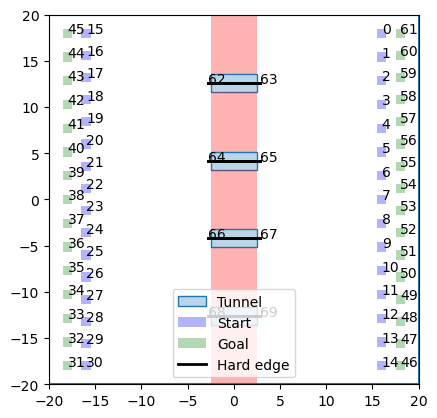

In [67]:
# Multi Tunnel
from panav.hybrid import MultiTunnelHG

bloating_r = 0.5

n_agents = list(range(1,41,10))
limits = [(-20,20),(-20,20)]
n_tunnel = 4

specs = dict(n_tunnel = n_tunnel, 
            tunnel_width = bloating_r*3.9,
            limits=limits,
            wallthickness = 5.0,
            bloating_r = bloating_r)

HG = MultiTunnelHG(**specs, 
                   N_agent=max(n_agents))
draw_hybrid(HG,
            display_node=True)


env_info = {'specs':specs,'constructor':MultiTunnelHG}
env_name = 'MultiTunnel'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

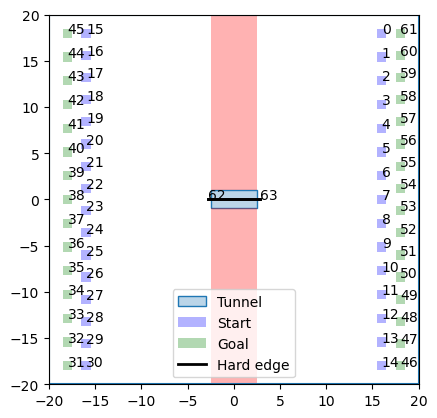

In [16]:
# Single Tunnel
from panav.hybrid import MultiTunnelHG

bloating_r = 0.5

n_agents = list(range(1,41,10))
limits = [(-20,20),(-20,20)]
n_tunnel = 1

specs = dict(n_tunnel = n_tunnel, 
            tunnel_width = bloating_r*3.9,
            limits=limits,
            wallthickness=5.0,
            bloating_r = bloating_r)


HG = MultiTunnelHG(**specs, 
                   N_agent=max(n_agents))
draw_hybrid(HG,
            display_node=True)


env_info = {'specs':specs,'constructor':MultiTunnelHG}
env_name = 'SingleTunnel'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

In [15]:
from matplotlib import pyplot as plt
from panav.hybrid import RoomHGBuilder
# Room Simplified


n_agents = list(range(1,41,10))
bloating_r = 0.5

specs = dict(n_col = 2, 
        n_row= 2, 
        cell_width= 30,
        cell_height= 30,
        gap_width= 2.5*bloating_r,
        wallthickness = 3.0,
        start_goal_dist= 50,
        bloating_r = bloating_r)


HG = RoomHGBuilder(**specs, N_agent=40)
draw_hybrid(HG,display_soft=True,show_agent_ID=True,display_node=False)

env_info = {'specs':specs,'constructor':RoomHGBuilder}
env_name = 'Room'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

NameError: name 'n_tunnel' is not defined

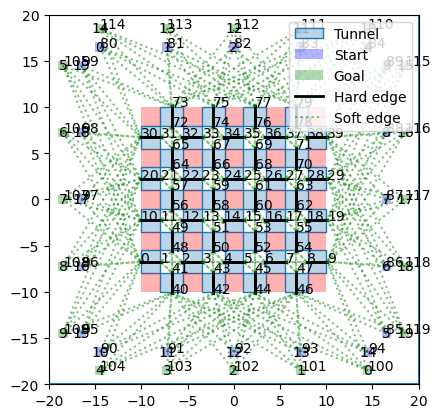

In [14]:
from panav.hybrid import WareHouseHGBuilder
# Warehouse
n_agents = list(range(1,41,10))
limits = [(-20,20),(-20,20)]
bloating_r = 0.5


specs = dict(limits = limits, 
                shelf_region_x_limit=[-10,10], 
                shelf_region_y_limit=[-10,10],
                obs_x_margin = 5.0 * bloating_r,
                obs_y_margin = 5.0 * bloating_r,
                n_col = 5, n_row = 5 , 

                corner_padding_x=5,corner_padding_y=5,
                bloating_r = bloating_r,
                tunnel_endpoint_buffer = 0.05)

HG = WareHouseHGBuilder(**specs, N_agent =20)
draw_hybrid(HG,show_agent_ID=True,display_node=True,display_soft=True)


env_info = {'specs':specs,'constructor':WareHouseHGBuilder}
env_name = 'Warehouse'

with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)